<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9759788	total: 62.5ms	remaining: 1m 2s
1:	learn: 0.9554941	total: 69.7ms	remaining: 34.8s
2:	learn: 0.9338353	total: 72.3ms	remaining: 24s
3:	learn: 0.9152324	total: 74.7ms	remaining: 18.6s
4:	learn: 0.8984056	total: 77.4ms	remaining: 15.4s
5:	learn: 0.8808683	total: 79.7ms	remaining: 13.2s
6:	learn: 0.8651876	total: 82.7ms	remaining: 11.7s
7:	learn: 0.8482390	total: 85.9ms	remaining: 10.7s
8:	learn: 0.8321451	total: 88.8ms	remaining: 9.78s
9:	learn: 0.8161948	total: 91.8ms	remaining: 9.09s
10:	learn: 0.8024842	total: 94.4ms	remaining: 8.49s
11:	learn: 0.7871946	total: 96.8ms	remaining: 7.97s
12:	learn: 0.7719633	total: 98.4ms	remaining: 7.47s
13:	learn: 0.7565736	total: 101ms	remaining: 7.1s
14:	learn: 0.7438032	total: 103ms	remaining: 6.79s
15:	learn: 0.7290312	total: 106ms	remaining: 6.5s
16:	learn: 0.7128639	total: 108ms	remaining: 6.25s
17:	learn: 0.7012279	total: 110ms	remaining: 5.98s
18:	learn: 0.6885824	total: 112ms	remaining: 5.76s
19:

30:	learn: 0.5675072	total: 175ms	remaining: 5.48s
31:	learn: 0.5589509	total: 178ms	remaining: 5.38s
32:	learn: 0.5518708	total: 180ms	remaining: 5.28s
33:	learn: 0.5439737	total: 184ms	remaining: 5.22s
34:	learn: 0.5363378	total: 186ms	remaining: 5.13s
35:	learn: 0.5291314	total: 188ms	remaining: 5.04s
36:	learn: 0.5228666	total: 190ms	remaining: 4.96s
37:	learn: 0.5167792	total: 193ms	remaining: 4.88s
38:	learn: 0.5101152	total: 195ms	remaining: 4.81s
39:	learn: 0.5024185	total: 197ms	remaining: 4.74s
40:	learn: 0.4955746	total: 200ms	remaining: 4.67s
41:	learn: 0.4889060	total: 202ms	remaining: 4.62s
42:	learn: 0.4829918	total: 206ms	remaining: 4.58s
43:	learn: 0.4784273	total: 209ms	remaining: 4.53s
44:	learn: 0.4721354	total: 211ms	remaining: 4.47s
45:	learn: 0.4674562	total: 213ms	remaining: 4.42s
46:	learn: 0.4628621	total: 216ms	remaining: 4.37s
47:	learn: 0.4572964	total: 218ms	remaining: 4.32s
48:	learn: 0.4521135	total: 220ms	remaining: 4.27s
49:	learn: 0.4467840	total: 223

82:	learn: 0.3394182	total: 326ms	remaining: 3.6s
83:	learn: 0.3374769	total: 328ms	remaining: 3.58s
84:	learn: 0.3358892	total: 332ms	remaining: 3.57s
85:	learn: 0.3338033	total: 335ms	remaining: 3.56s
86:	learn: 0.3324307	total: 337ms	remaining: 3.54s
87:	learn: 0.3305441	total: 340ms	remaining: 3.52s
88:	learn: 0.3290572	total: 342ms	remaining: 3.5s
89:	learn: 0.3270725	total: 347ms	remaining: 3.5s
90:	learn: 0.3247158	total: 350ms	remaining: 3.5s
91:	learn: 0.3235187	total: 353ms	remaining: 3.48s
92:	learn: 0.3218779	total: 355ms	remaining: 3.46s
93:	learn: 0.3202072	total: 359ms	remaining: 3.46s
94:	learn: 0.3186806	total: 361ms	remaining: 3.44s
95:	learn: 0.3182145	total: 364ms	remaining: 3.43s
96:	learn: 0.3161492	total: 366ms	remaining: 3.41s
97:	learn: 0.3147399	total: 369ms	remaining: 3.39s
98:	learn: 0.3137454	total: 370ms	remaining: 3.37s
99:	learn: 0.3122033	total: 373ms	remaining: 3.36s
100:	learn: 0.3110224	total: 377ms	remaining: 3.35s
101:	learn: 0.3097727	total: 397ms

122:	learn: 0.2851358	total: 518ms	remaining: 3.69s
123:	learn: 0.2840354	total: 522ms	remaining: 3.69s
124:	learn: 0.2825513	total: 525ms	remaining: 3.68s
125:	learn: 0.2811693	total: 530ms	remaining: 3.68s
126:	learn: 0.2801061	total: 537ms	remaining: 3.69s
127:	learn: 0.2784601	total: 541ms	remaining: 3.68s
128:	learn: 0.2777035	total: 545ms	remaining: 3.68s
129:	learn: 0.2766598	total: 548ms	remaining: 3.66s
130:	learn: 0.2757755	total: 550ms	remaining: 3.65s
131:	learn: 0.2751492	total: 553ms	remaining: 3.63s
132:	learn: 0.2742847	total: 556ms	remaining: 3.62s
133:	learn: 0.2736191	total: 558ms	remaining: 3.61s
134:	learn: 0.2729886	total: 562ms	remaining: 3.6s
135:	learn: 0.2720918	total: 601ms	remaining: 3.82s
136:	learn: 0.2712161	total: 605ms	remaining: 3.81s
137:	learn: 0.2706965	total: 608ms	remaining: 3.8s
138:	learn: 0.2701645	total: 612ms	remaining: 3.79s
139:	learn: 0.2695274	total: 614ms	remaining: 3.77s
140:	learn: 0.2687743	total: 617ms	remaining: 3.76s
141:	learn: 0.

156:	learn: 0.2545252	total: 682ms	remaining: 3.66s
157:	learn: 0.2533137	total: 684ms	remaining: 3.65s
158:	learn: 0.2519601	total: 687ms	remaining: 3.63s
159:	learn: 0.2514829	total: 695ms	remaining: 3.65s
160:	learn: 0.2502795	total: 700ms	remaining: 3.65s
161:	learn: 0.2495743	total: 703ms	remaining: 3.63s
162:	learn: 0.2488352	total: 705ms	remaining: 3.62s
163:	learn: 0.2481419	total: 707ms	remaining: 3.6s
164:	learn: 0.2475909	total: 708ms	remaining: 3.58s
165:	learn: 0.2468832	total: 710ms	remaining: 3.57s
166:	learn: 0.2462286	total: 712ms	remaining: 3.55s
167:	learn: 0.2456225	total: 714ms	remaining: 3.54s
168:	learn: 0.2447183	total: 717ms	remaining: 3.53s
169:	learn: 0.2441006	total: 719ms	remaining: 3.51s
170:	learn: 0.2435864	total: 721ms	remaining: 3.49s
171:	learn: 0.2425731	total: 724ms	remaining: 3.48s
172:	learn: 0.2417140	total: 727ms	remaining: 3.47s
173:	learn: 0.2413446	total: 743ms	remaining: 3.53s
174:	learn: 0.2410754	total: 747ms	remaining: 3.52s
175:	learn: 0

213:	learn: 0.2209129	total: 851ms	remaining: 3.13s
214:	learn: 0.2205397	total: 854ms	remaining: 3.12s
215:	learn: 0.2201386	total: 858ms	remaining: 3.11s
216:	learn: 0.2197670	total: 862ms	remaining: 3.11s
217:	learn: 0.2192499	total: 879ms	remaining: 3.15s
218:	learn: 0.2190001	total: 881ms	remaining: 3.14s
219:	learn: 0.2187089	total: 884ms	remaining: 3.13s
220:	learn: 0.2182062	total: 887ms	remaining: 3.13s
221:	learn: 0.2180393	total: 889ms	remaining: 3.12s
222:	learn: 0.2176611	total: 891ms	remaining: 3.11s
223:	learn: 0.2171217	total: 894ms	remaining: 3.1s
224:	learn: 0.2165978	total: 909ms	remaining: 3.13s
225:	learn: 0.2162288	total: 912ms	remaining: 3.12s
226:	learn: 0.2154682	total: 914ms	remaining: 3.11s
227:	learn: 0.2152949	total: 918ms	remaining: 3.11s
228:	learn: 0.2148046	total: 920ms	remaining: 3.1s
229:	learn: 0.2142320	total: 923ms	remaining: 3.09s
230:	learn: 0.2135163	total: 925ms	remaining: 3.08s
231:	learn: 0.2127517	total: 928ms	remaining: 3.07s
232:	learn: 0.

260:	learn: 0.2003611	total: 1.03s	remaining: 2.91s
261:	learn: 0.1996898	total: 1.03s	remaining: 2.9s
262:	learn: 0.1989543	total: 1.04s	remaining: 2.93s
263:	learn: 0.1983327	total: 1.05s	remaining: 2.92s
264:	learn: 0.1978046	total: 1.05s	remaining: 2.91s
265:	learn: 0.1971962	total: 1.05s	remaining: 2.9s
266:	learn: 0.1965276	total: 1.05s	remaining: 2.89s
267:	learn: 0.1961146	total: 1.06s	remaining: 2.88s
268:	learn: 0.1959494	total: 1.06s	remaining: 2.88s
269:	learn: 0.1954212	total: 1.06s	remaining: 2.87s
270:	learn: 0.1948573	total: 1.06s	remaining: 2.86s
271:	learn: 0.1945258	total: 1.07s	remaining: 2.86s
272:	learn: 0.1935435	total: 1.07s	remaining: 2.85s
273:	learn: 0.1930569	total: 1.07s	remaining: 2.85s
274:	learn: 0.1926438	total: 1.08s	remaining: 2.84s
275:	learn: 0.1919346	total: 1.08s	remaining: 2.84s
276:	learn: 0.1915111	total: 1.08s	remaining: 2.83s
277:	learn: 0.1909966	total: 1.09s	remaining: 2.82s
278:	learn: 0.1904305	total: 1.09s	remaining: 2.81s
279:	learn: 0.

323:	learn: 0.1697261	total: 1.2s	remaining: 2.51s
324:	learn: 0.1693251	total: 1.21s	remaining: 2.51s
325:	learn: 0.1689457	total: 1.21s	remaining: 2.5s
326:	learn: 0.1685422	total: 1.21s	remaining: 2.49s
327:	learn: 0.1682113	total: 1.21s	remaining: 2.49s
328:	learn: 0.1678113	total: 1.22s	remaining: 2.48s
329:	learn: 0.1675697	total: 1.22s	remaining: 2.48s
330:	learn: 0.1672297	total: 1.22s	remaining: 2.47s
331:	learn: 0.1670936	total: 1.22s	remaining: 2.46s
332:	learn: 0.1667327	total: 1.23s	remaining: 2.46s
333:	learn: 0.1661887	total: 1.23s	remaining: 2.45s
334:	learn: 0.1661118	total: 1.23s	remaining: 2.45s
335:	learn: 0.1657457	total: 1.24s	remaining: 2.44s
336:	learn: 0.1653027	total: 1.24s	remaining: 2.43s
337:	learn: 0.1649270	total: 1.24s	remaining: 2.43s
338:	learn: 0.1646827	total: 1.24s	remaining: 2.42s
339:	learn: 0.1643302	total: 1.25s	remaining: 2.42s
340:	learn: 0.1640656	total: 1.25s	remaining: 2.41s
341:	learn: 0.1636092	total: 1.25s	remaining: 2.4s
342:	learn: 0.1

362:	learn: 0.1563554	total: 1.38s	remaining: 2.43s
363:	learn: 0.1560191	total: 1.39s	remaining: 2.42s
364:	learn: 0.1557539	total: 1.39s	remaining: 2.42s
365:	learn: 0.1555588	total: 1.39s	remaining: 2.41s
366:	learn: 0.1554789	total: 1.4s	remaining: 2.41s
367:	learn: 0.1552327	total: 1.4s	remaining: 2.4s
368:	learn: 0.1547887	total: 1.4s	remaining: 2.4s
369:	learn: 0.1546599	total: 1.41s	remaining: 2.39s
370:	learn: 0.1543891	total: 1.41s	remaining: 2.39s
371:	learn: 0.1540150	total: 1.41s	remaining: 2.39s
372:	learn: 0.1536204	total: 1.42s	remaining: 2.38s
373:	learn: 0.1532694	total: 1.42s	remaining: 2.38s
374:	learn: 0.1528349	total: 1.42s	remaining: 2.37s
375:	learn: 0.1524218	total: 1.43s	remaining: 2.37s
376:	learn: 0.1519880	total: 1.43s	remaining: 2.36s
377:	learn: 0.1516946	total: 1.43s	remaining: 2.35s
378:	learn: 0.1514184	total: 1.44s	remaining: 2.35s
379:	learn: 0.1512320	total: 1.44s	remaining: 2.35s
380:	learn: 0.1507384	total: 1.44s	remaining: 2.35s
381:	learn: 0.150

400:	learn: 0.1446108	total: 1.52s	remaining: 2.27s
401:	learn: 0.1442791	total: 1.52s	remaining: 2.27s
402:	learn: 0.1439189	total: 1.53s	remaining: 2.26s
403:	learn: 0.1436622	total: 1.53s	remaining: 2.26s
404:	learn: 0.1431185	total: 1.53s	remaining: 2.25s
405:	learn: 0.1427015	total: 1.53s	remaining: 2.25s
406:	learn: 0.1423903	total: 1.54s	remaining: 2.24s
407:	learn: 0.1420361	total: 1.54s	remaining: 2.23s
408:	learn: 0.1415968	total: 1.54s	remaining: 2.23s
409:	learn: 0.1412688	total: 1.54s	remaining: 2.22s
410:	learn: 0.1411648	total: 1.55s	remaining: 2.22s
411:	learn: 0.1409568	total: 1.55s	remaining: 2.21s
412:	learn: 0.1407237	total: 1.55s	remaining: 2.21s
413:	learn: 0.1403075	total: 1.55s	remaining: 2.2s
414:	learn: 0.1400457	total: 1.56s	remaining: 2.19s
415:	learn: 0.1397793	total: 1.56s	remaining: 2.19s
416:	learn: 0.1395856	total: 1.56s	remaining: 2.18s
417:	learn: 0.1393100	total: 1.56s	remaining: 2.18s
418:	learn: 0.1388459	total: 1.56s	remaining: 2.17s
419:	learn: 0

461:	learn: 0.1296905	total: 1.7s	remaining: 1.98s
462:	learn: 0.1294720	total: 1.7s	remaining: 1.97s
463:	learn: 0.1292972	total: 1.7s	remaining: 1.97s
464:	learn: 0.1290209	total: 1.71s	remaining: 1.96s
465:	learn: 0.1288365	total: 1.73s	remaining: 1.98s
466:	learn: 0.1287813	total: 1.73s	remaining: 1.98s
467:	learn: 0.1286203	total: 1.73s	remaining: 1.97s
468:	learn: 0.1285456	total: 1.74s	remaining: 1.97s
469:	learn: 0.1282168	total: 1.74s	remaining: 1.96s
470:	learn: 0.1278791	total: 1.74s	remaining: 1.96s
471:	learn: 0.1274075	total: 1.74s	remaining: 1.95s
472:	learn: 0.1273837	total: 1.75s	remaining: 1.95s
473:	learn: 0.1271102	total: 1.75s	remaining: 1.94s
474:	learn: 0.1269433	total: 1.75s	remaining: 1.94s
475:	learn: 0.1268729	total: 1.75s	remaining: 1.93s
476:	learn: 0.1264426	total: 1.76s	remaining: 1.93s
477:	learn: 0.1262697	total: 1.76s	remaining: 1.92s
478:	learn: 0.1259378	total: 1.76s	remaining: 1.92s
479:	learn: 0.1257523	total: 1.76s	remaining: 1.91s
480:	learn: 0.1

509:	learn: 0.1191444	total: 1.87s	remaining: 1.8s
510:	learn: 0.1188415	total: 1.88s	remaining: 1.79s
511:	learn: 0.1186259	total: 1.88s	remaining: 1.79s
512:	learn: 0.1184269	total: 1.88s	remaining: 1.79s
513:	learn: 0.1182032	total: 1.88s	remaining: 1.78s
514:	learn: 0.1180488	total: 1.89s	remaining: 1.78s
515:	learn: 0.1178047	total: 1.89s	remaining: 1.77s
516:	learn: 0.1174936	total: 1.89s	remaining: 1.77s
517:	learn: 0.1172173	total: 1.9s	remaining: 1.76s
518:	learn: 0.1169871	total: 1.9s	remaining: 1.76s
519:	learn: 0.1166909	total: 1.9s	remaining: 1.75s
520:	learn: 0.1164252	total: 1.91s	remaining: 1.75s
521:	learn: 0.1162050	total: 1.91s	remaining: 1.75s
522:	learn: 0.1160677	total: 1.91s	remaining: 1.74s
523:	learn: 0.1160480	total: 1.91s	remaining: 1.74s
524:	learn: 0.1159472	total: 1.92s	remaining: 1.73s
525:	learn: 0.1157801	total: 1.92s	remaining: 1.73s
526:	learn: 0.1157270	total: 1.92s	remaining: 1.72s
527:	learn: 0.1154936	total: 1.92s	remaining: 1.72s
528:	learn: 0.11

540:	learn: 0.1123651	total: 1.96s	remaining: 1.66s
541:	learn: 0.1121068	total: 1.96s	remaining: 1.66s
542:	learn: 0.1118267	total: 1.96s	remaining: 1.65s
543:	learn: 0.1116112	total: 1.96s	remaining: 1.65s
544:	learn: 0.1115300	total: 1.97s	remaining: 1.64s
545:	learn: 0.1112690	total: 1.97s	remaining: 1.64s
546:	learn: 0.1109904	total: 1.97s	remaining: 1.63s
547:	learn: 0.1109767	total: 1.97s	remaining: 1.63s
548:	learn: 0.1109632	total: 1.98s	remaining: 1.62s
549:	learn: 0.1106721	total: 1.98s	remaining: 1.62s
550:	learn: 0.1103893	total: 1.98s	remaining: 1.61s
551:	learn: 0.1101890	total: 1.98s	remaining: 1.61s
552:	learn: 0.1100017	total: 1.99s	remaining: 1.6s
553:	learn: 0.1097741	total: 1.99s	remaining: 1.6s
554:	learn: 0.1095351	total: 1.99s	remaining: 1.6s
555:	learn: 0.1094774	total: 2s	remaining: 1.59s
556:	learn: 0.1092624	total: 2s	remaining: 1.59s
557:	learn: 0.1090751	total: 2s	remaining: 1.58s
558:	learn: 0.1088251	total: 2s	remaining: 1.58s
559:	learn: 0.1086564	total

591:	learn: 0.1019830	total: 2.12s	remaining: 1.46s
592:	learn: 0.1017710	total: 2.13s	remaining: 1.46s
593:	learn: 0.1015810	total: 2.13s	remaining: 1.45s
594:	learn: 0.1013961	total: 2.13s	remaining: 1.45s
595:	learn: 0.1012580	total: 2.13s	remaining: 1.45s
596:	learn: 0.1010318	total: 2.13s	remaining: 1.44s
597:	learn: 0.1008061	total: 2.14s	remaining: 1.44s
598:	learn: 0.1005513	total: 2.14s	remaining: 1.43s
599:	learn: 0.1004452	total: 2.15s	remaining: 1.44s
600:	learn: 0.1002386	total: 2.16s	remaining: 1.44s
601:	learn: 0.1000707	total: 2.16s	remaining: 1.43s
602:	learn: 0.0998849	total: 2.17s	remaining: 1.43s
603:	learn: 0.0997111	total: 2.17s	remaining: 1.42s
604:	learn: 0.0994995	total: 2.17s	remaining: 1.42s
605:	learn: 0.0994649	total: 2.17s	remaining: 1.41s
606:	learn: 0.0992563	total: 2.18s	remaining: 1.41s
607:	learn: 0.0990117	total: 2.18s	remaining: 1.41s
608:	learn: 0.0988838	total: 2.2s	remaining: 1.41s
609:	learn: 0.0987250	total: 2.2s	remaining: 1.41s
610:	learn: 0.

628:	learn: 0.0957746	total: 2.29s	remaining: 1.35s
629:	learn: 0.0955899	total: 2.29s	remaining: 1.34s
630:	learn: 0.0953781	total: 2.29s	remaining: 1.34s
631:	learn: 0.0951421	total: 2.29s	remaining: 1.34s
632:	learn: 0.0950401	total: 2.3s	remaining: 1.33s
633:	learn: 0.0948407	total: 2.3s	remaining: 1.33s
634:	learn: 0.0947319	total: 2.31s	remaining: 1.32s
635:	learn: 0.0945319	total: 2.31s	remaining: 1.32s
636:	learn: 0.0945168	total: 2.31s	remaining: 1.32s
637:	learn: 0.0944436	total: 2.31s	remaining: 1.31s
638:	learn: 0.0943754	total: 2.32s	remaining: 1.31s
639:	learn: 0.0941985	total: 2.32s	remaining: 1.3s
640:	learn: 0.0940126	total: 2.32s	remaining: 1.3s
641:	learn: 0.0938837	total: 2.32s	remaining: 1.29s
642:	learn: 0.0938726	total: 2.33s	remaining: 1.29s
643:	learn: 0.0936067	total: 2.33s	remaining: 1.29s
644:	learn: 0.0934223	total: 2.33s	remaining: 1.28s
645:	learn: 0.0932700	total: 2.33s	remaining: 1.28s
646:	learn: 0.0931236	total: 2.34s	remaining: 1.27s
647:	learn: 0.09

675:	learn: 0.0889122	total: 2.43s	remaining: 1.17s
676:	learn: 0.0887581	total: 2.43s	remaining: 1.16s
677:	learn: 0.0886052	total: 2.44s	remaining: 1.16s
678:	learn: 0.0884342	total: 2.44s	remaining: 1.15s
679:	learn: 0.0883038	total: 2.44s	remaining: 1.15s
680:	learn: 0.0882922	total: 2.44s	remaining: 1.14s
681:	learn: 0.0881758	total: 2.45s	remaining: 1.14s
682:	learn: 0.0880463	total: 2.45s	remaining: 1.14s
683:	learn: 0.0878812	total: 2.45s	remaining: 1.13s
684:	learn: 0.0878419	total: 2.45s	remaining: 1.13s
685:	learn: 0.0876350	total: 2.46s	remaining: 1.12s
686:	learn: 0.0875981	total: 2.46s	remaining: 1.12s
687:	learn: 0.0874477	total: 2.46s	remaining: 1.12s
688:	learn: 0.0873540	total: 2.46s	remaining: 1.11s
689:	learn: 0.0872267	total: 2.47s	remaining: 1.11s
690:	learn: 0.0870163	total: 2.47s	remaining: 1.1s
691:	learn: 0.0868967	total: 2.47s	remaining: 1.1s
692:	learn: 0.0867139	total: 2.48s	remaining: 1.1s
693:	learn: 0.0865208	total: 2.48s	remaining: 1.09s
694:	learn: 0.0

737:	learn: 0.0801500	total: 2.6s	remaining: 921ms
738:	learn: 0.0800388	total: 2.6s	remaining: 917ms
739:	learn: 0.0798951	total: 2.6s	remaining: 914ms
740:	learn: 0.0797294	total: 2.6s	remaining: 910ms
741:	learn: 0.0795964	total: 2.6s	remaining: 906ms
742:	learn: 0.0794319	total: 2.61s	remaining: 902ms
743:	learn: 0.0793398	total: 2.61s	remaining: 898ms
744:	learn: 0.0793069	total: 2.61s	remaining: 895ms
745:	learn: 0.0791145	total: 2.62s	remaining: 891ms
746:	learn: 0.0790826	total: 2.62s	remaining: 887ms
747:	learn: 0.0789468	total: 2.62s	remaining: 883ms
748:	learn: 0.0788312	total: 2.62s	remaining: 879ms
749:	learn: 0.0786391	total: 2.63s	remaining: 875ms
750:	learn: 0.0785728	total: 2.63s	remaining: 871ms
751:	learn: 0.0784450	total: 2.63s	remaining: 868ms
752:	learn: 0.0783852	total: 2.63s	remaining: 864ms
753:	learn: 0.0782794	total: 2.64s	remaining: 860ms
754:	learn: 0.0781728	total: 2.64s	remaining: 856ms
755:	learn: 0.0780269	total: 2.64s	remaining: 853ms
756:	learn: 0.077

803:	learn: 0.0723226	total: 2.77s	remaining: 675ms
804:	learn: 0.0722707	total: 2.77s	remaining: 672ms
805:	learn: 0.0721343	total: 2.78s	remaining: 669ms
806:	learn: 0.0720940	total: 2.78s	remaining: 665ms
807:	learn: 0.0719411	total: 2.78s	remaining: 662ms
808:	learn: 0.0719085	total: 2.79s	remaining: 658ms
809:	learn: 0.0717442	total: 2.79s	remaining: 654ms
810:	learn: 0.0716377	total: 2.79s	remaining: 651ms
811:	learn: 0.0715169	total: 2.79s	remaining: 647ms
812:	learn: 0.0713943	total: 2.8s	remaining: 643ms
813:	learn: 0.0712141	total: 2.8s	remaining: 640ms
814:	learn: 0.0711086	total: 2.8s	remaining: 636ms
815:	learn: 0.0710462	total: 2.8s	remaining: 632ms
816:	learn: 0.0709312	total: 2.81s	remaining: 629ms
817:	learn: 0.0708767	total: 2.81s	remaining: 625ms
818:	learn: 0.0707870	total: 2.81s	remaining: 622ms
819:	learn: 0.0706773	total: 2.81s	remaining: 618ms
820:	learn: 0.0705829	total: 2.82s	remaining: 614ms
821:	learn: 0.0704319	total: 2.82s	remaining: 611ms
822:	learn: 0.07

880:	learn: 0.0648528	total: 2.95s	remaining: 399ms
881:	learn: 0.0647789	total: 2.96s	remaining: 396ms
882:	learn: 0.0646883	total: 2.96s	remaining: 393ms
883:	learn: 0.0645820	total: 2.97s	remaining: 389ms
884:	learn: 0.0645136	total: 2.97s	remaining: 386ms
885:	learn: 0.0644327	total: 2.97s	remaining: 383ms
886:	learn: 0.0643323	total: 2.98s	remaining: 379ms
887:	learn: 0.0643078	total: 2.98s	remaining: 376ms
888:	learn: 0.0642264	total: 2.98s	remaining: 372ms
889:	learn: 0.0641371	total: 2.98s	remaining: 369ms
890:	learn: 0.0640185	total: 2.99s	remaining: 366ms
891:	learn: 0.0639336	total: 2.99s	remaining: 362ms
892:	learn: 0.0638905	total: 3s	remaining: 359ms
893:	learn: 0.0638219	total: 3s	remaining: 356ms
894:	learn: 0.0636943	total: 3s	remaining: 352ms
895:	learn: 0.0635964	total: 3s	remaining: 349ms
896:	learn: 0.0634735	total: 3.01s	remaining: 346ms
897:	learn: 0.0633695	total: 3.01s	remaining: 342ms
898:	learn: 0.0632224	total: 3.01s	remaining: 339ms
899:	learn: 0.0631659	to

928:	learn: 0.0607662	total: 3.12s	remaining: 238ms
929:	learn: 0.0607490	total: 3.12s	remaining: 235ms
930:	learn: 0.0606441	total: 3.13s	remaining: 232ms
931:	learn: 0.0605418	total: 3.13s	remaining: 228ms
932:	learn: 0.0604934	total: 3.13s	remaining: 225ms
933:	learn: 0.0604205	total: 3.13s	remaining: 222ms
934:	learn: 0.0603688	total: 3.14s	remaining: 218ms
935:	learn: 0.0603257	total: 3.14s	remaining: 215ms
936:	learn: 0.0603202	total: 3.14s	remaining: 211ms
937:	learn: 0.0602513	total: 3.14s	remaining: 208ms
938:	learn: 0.0600949	total: 3.15s	remaining: 204ms
939:	learn: 0.0599842	total: 3.15s	remaining: 201ms
940:	learn: 0.0598671	total: 3.15s	remaining: 198ms
941:	learn: 0.0597739	total: 3.15s	remaining: 194ms
942:	learn: 0.0597602	total: 3.15s	remaining: 191ms
943:	learn: 0.0596628	total: 3.16s	remaining: 187ms
944:	learn: 0.0596522	total: 3.16s	remaining: 184ms
945:	learn: 0.0595373	total: 3.16s	remaining: 181ms
946:	learn: 0.0594761	total: 3.17s	remaining: 177ms
947:	learn: 

995:	learn: 0.0555596	total: 3.3s	remaining: 13.2ms
996:	learn: 0.0554879	total: 3.3s	remaining: 9.93ms
997:	learn: 0.0554825	total: 3.3s	remaining: 6.62ms
998:	learn: 0.0554395	total: 3.31s	remaining: 3.31ms
999:	learn: 0.0553293	total: 3.31s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.19932769499723815
ABC Pre-generator MAE 0.19830954043345617


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

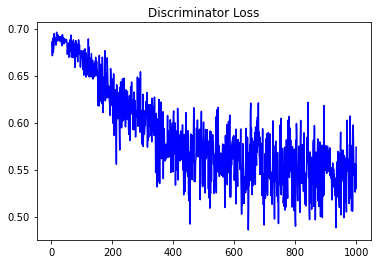

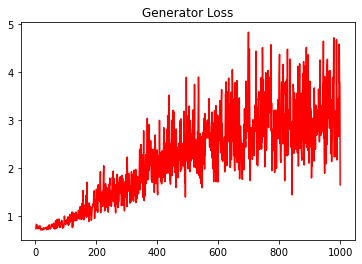

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2478303390553386


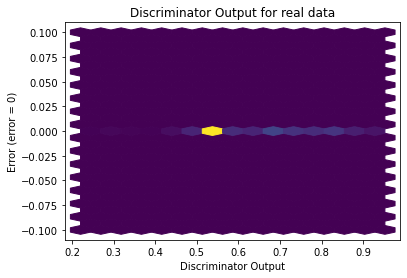

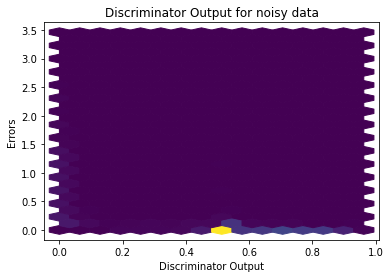

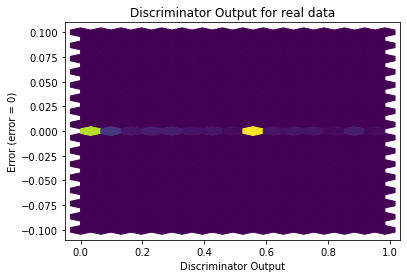

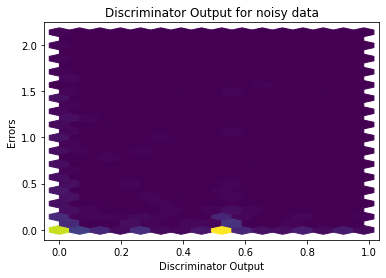

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())